<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Pro1_HR_TurnOver_Predictive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDISI NGULIK DATA ini bertujuan membuat model prediksi karyawan akan resign atau tidak berdasarkan data-data histori di HR dengan algoritman LOGISTIC REGRESSION.

#1. Persiapan awal eksplorasi data-instalasi dan loading data

In [2]:
#Istall Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_hr = pd.read_csv('/content/sample_data/Pro1_HR_TurnOver_Predictive.csv')

#2. Memahai data untuk memastikan data valid dan layak diproses

In [4]:
#Property dataset (Jumlah bari dan kolom)
data_hr.shape
#Hasilnya ada 1499 barsi data dan 10 kolom data

(14999, 10)

In [5]:
#Meta data
data_hr.info()
#Ada data type float, interger, dan object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#Sample data
data_hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [7]:
#Identifikasi data NA
data_hr.isna().sum()
#Hasilnya tidak ada nilai NA

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [8]:
#Identifikasi data Null
data_hr.isnull().sum()
#Hasilnya tidak ada nilai Null

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


#3. Eksplorasi data untuk memahami perilaku data & pola awal.

In [9]:
# Memilih kolom numerik untuk deteksi outlier
numerical_cols = data_hr.select_dtypes(include=np.number).columns
#Hadling outlier data, data terdistribusi normal
print("Outliers in each numerical attribute:")
for column in numerical_cols:
    Q1 = data_hr[column].quantile(0.25)
    Q3 = data_hr[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_hr[(data_hr[column] < lower_bound) | (data_hr[column] > upper_bound)][column]

    if not outliers.empty:
        print(f"\n--- Column: {column} ---")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Number of outliers: {len(outliers)}")
        print("Outlier values (first 5 shown if many):\n", outliers.head())
    else:
        print(f"\n--- Column: {column} ---")
        print("No outliers detected using IQR method.")

Outliers in each numerical attribute:

--- Column: satisfaction_level ---
No outliers detected using IQR method.

--- Column: last_evaluation ---
No outliers detected using IQR method.

--- Column: number_project ---
No outliers detected using IQR method.

--- Column: average_montly_hours ---
No outliers detected using IQR method.

--- Column: time_spend_company ---
Q1: 3.0, Q3: 4.0, IQR: 1.0
Lower Bound: 1.5, Upper Bound: 5.5
Number of outliers: 1282
Outlier values (first 5 shown if many):
 1     6
17    6
34    6
47    6
67    6
Name: time_spend_company, dtype: int64

--- Column: Work_accident ---
Q1: 0.0, Q3: 0.0, IQR: 0.0
Lower Bound: 0.0, Upper Bound: 0.0
Number of outliers: 2169
Outlier values (first 5 shown if many):
 18     1
68     1
120    1
123    1
136    1
Name: Work_accident, dtype: int64

--- Column: left ---
Q1: 0.0, Q3: 0.0, IQR: 0.0
Lower Bound: 0.0, Upper Bound: 0.0
Number of outliers: 3571
Outlier values (first 5 shown if many):
 0    1
1    1
2    1
3    1
4    1
N

In [10]:
#Identifikasi korelasi antar feature yang numeric
feature_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

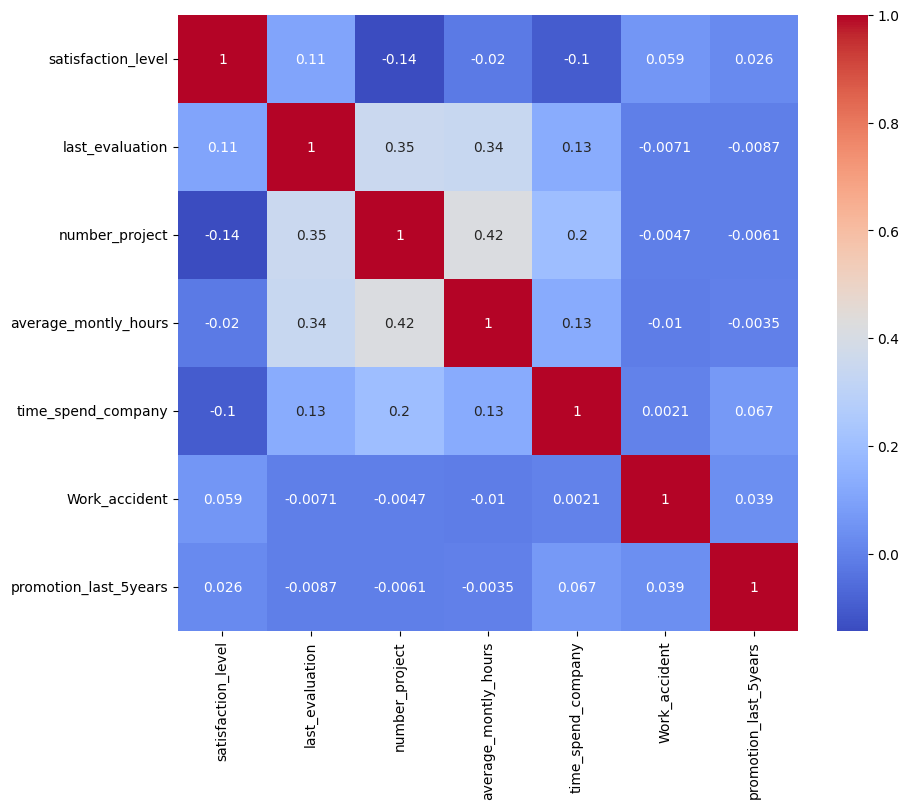

In [11]:
#Tampilan korelasi anter feature
df_hr = data_hr[feature_columns]
correlation = df_hr.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [12]:
#Cari tahu korelasi feature terhadap feature "LEFT" untuk memahami sejauh apa (data) bisa menjadi triger karyawan 'LEFT".
data_hr_corr = data_hr[[
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    'left',
    'promotion_last_5years'
]]
data_hr_corr.corr()['left'].sort_values(ascending=True)


,left
satisfaction_level,-0.388375
promotion_last_5years,-0.061788
last_evaluation,0.006567
number_project,0.023787
average_montly_hours,0.071287
time_spend_company,0.144822
left,1.000000


#4. Pimilihan feature terbaik (Tanpa melakukan feature engineering)

In [13]:
X = data_hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','promotion_last_5years']]
y = data_hr['left']

#5. Training dan split feature

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Scalling dengan standaridasi data untuk menghindari bias

In [15]:
#Mencari tahu keragaman data
data_hr.value_counts()
#Isi data feature berangam sehingga perlu scalling agar tidak bias; "average_montly_hours" bisa dianggap paling penting karena nilai tinggi

satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years  sales        salary
0.46                0.57             2               139                   3                   0              1     0                      sales        low       6
0.37                0.51             2               127                   3                   0              1     0                      sales        medium    4
0.41                0.46             2               128                   3                   0              1     0                      accounting   low       4
0.42                0.53             2               142                   3                   0              1     0                      sales        low       4
0.37                0.46             2               156                   3                   0              1     0                      sales        low       4
                                                                                                                                                                 ..
0.58                0.79             5               197                   3                   0              0     0                      RandD        medium    1
                                                     262                   2                   0              0     0                      sales        high      1
                    0.80             3               181                   4                   0              0     0                      technical    high      1
                                     5               187                   3                   1              0     0                      product_mng  low       1
                    0.77             5               272                   2                   1              0     0                      technical    low       1
Name: count, Length: 11991, dtype: int64

In [16]:
#Scaling dengan standardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#Hasil scalling, data lebih seragam
X_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X.columns
)
#Dengan scaling maka koefisien lebih stabil,Training lebih cepat, Interpretasi fitur lebih adil
X_scaled_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
0,1.555391,-0.619346,-0.653412,-0.260887,0.340617,-0.149989
1,-1.818394,0.372007,0.156954,-0.100652,1.024071,-0.149989
2,0.752109,0.488637,-0.653412,-0.521269,-1.026293,-0.149989
3,0.189811,0.838527,0.156954,-1.783117,1.707526,-0.149989
4,-2.019214,1.246731,2.588050,1.661929,0.340617,-0.149989


#7. Membuat model dengan algoritmas Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
#y_pred = model.predict(X_test_scaled)
#y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [19]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]

threshold = 0.3
y_pred = (y_prob >= threshold).astype(int)


#8.Evaluasi model

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#Prediksi stay (0)
#Sebesar 90% yang diperediksi stay adalah benar. Sebesar 81% dari semua yang stay terdeteksi.
#Prediksi resign (1)
#Sebesar 53% yang diperediksi resign adalah benar. Sebesar 70% dari semua yang resign terdeteksi. F1-score 61% artinya cukup baik karena 61% yang resign terdeteksi.

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2294
           1       0.53      0.70      0.61       706

    accuracy                           0.79      3000
   macro avg       0.72      0.76      0.73      3000
weighted avg       0.81      0.79      0.79      3000



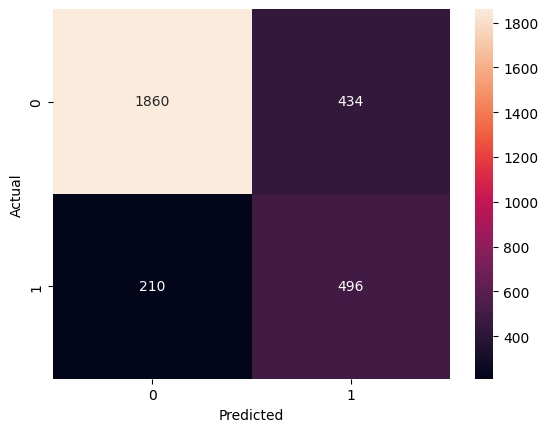

In [21]:
#Koefisien (+) → menaikkan risiko resign
#Koefisien (–) → menurunkan risiko resign
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
#Koefisien (+) → menaikkan risiko resign
#Koefisien (–) → menurunkan risiko resign
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)


                 Feature  Coefficient
4     time_spend_company     0.305770
3   average_montly_hours     0.239611
1        last_evaluation     0.118648
5  promotion_last_5years    -0.270081
2         number_project    -0.369768
0     satisfaction_level    -1.042098


#9. Uji validasi model dengan cross validation

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model, X_train_scaled, y_train,
    cv=5, scoring='roc_auc'
)
print("Mean AUC:", scores.mean())
# Nilai Area Under Curve = 0.79 termasuk kategori momdel yang cukup baik (stabil):0.79 (79%) yang menandakan kemampuan model dalam membedakan kelas resign dan tidak resign.

Mean AUC: 0.7883173813840695


#10. Menyimpan model (Pre-production)

In [24]:
import joblib
joblib.dump(model, 'attrition_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

#11. Web App (Streamlit). Tujuan Agar semua orang bisa pakai modelnya


In [26]:
!pip install streamlit
import streamlit as st
import joblib
model = joblib.load('attrition_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("HR Attrition Prediction")

hours = st.number_input("Average Monthly Hours")
projects = st.number_input("Number of Projects")
evaluation = st.slider("Last Evaluation", 0.0, 1.0)

workload = hours / max(projects,1)

X = scaler.transform([[hours, projects, evaluation, workload, 0, 1]])
prob = model.predict_proba(X)[0][1]

st.write(f"Risk of Attrition: {prob:.2%}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 9.5 MB/s eta 0:00:00


2026-02-01 07:32:06.923 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 07:32:07.206 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-01 07:32:07.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 07:32:07.208 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 07:32:07.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 07:32:07.211 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 07:32:07.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 07:32:07.214 Thread 'MainThread': mi